### Vignesh S

### Task 1: Exploratory Data Analysis (EDA) and Business Insights

In [31]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Loading the datasets
df_customer = pd.read_csv('Customers.csv')
df_product = pd.read_csv('Products.csv')
df_transaction = pd.read_csv('Transactions.csv')

In [39]:
print(df_customer.info())
print()
print(df_product.info())
print()
print(df_transaction.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           ------------

In [41]:
# Converts the Date feature in the dataset into proper DateTime Format
# errors='coerce', ensures that any invalid or non-convertible date entries are handled in a proper way
df_customer['SignupDate'] = pd.to_datetime(df_customer['SignupDate'], errors='coerce')
df_transaction['TransactionDate'] = pd.to_datetime(df_transaction['TransactionDate'], errors='coerce')

In [47]:
# Check for missing data
datasets = {
    'Customers': df_customer,
    'Products': df_product,
    'Transactions': df_transaction
}

# Loop through each dataset to check for missing values
for name, df in datasets.items():
    print(f"Missing Values in {name}:")
    print(df.isnull().sum(), end='\n')

Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


##### From the above results, it is observed that there are no missing data from the datasets thus we can proceed with the rest of the process.

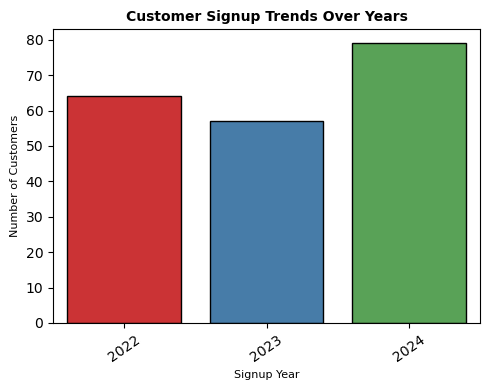

In [49]:
df_customer['SignupYear'] = df_customer['SignupDate'].dt.year
plt.figure(figsize=(5,4))
sns.countplot(x = 'SignupYear', data = df_customer, hue = 'SignupYear', palette = 'Set1', legend = False, edgecolor ='black', order = sorted(df_customer['SignupYear'].unique()))
plt.title('Customer Signup Trends Over Years', fontsize=10, weight='bold')
plt.xlabel('Signup Year', fontsize=8)
plt.ylabel('Number of Customers', fontsize=8)
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

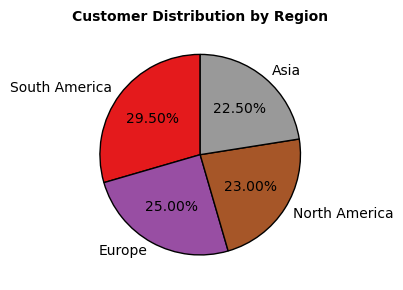

In [51]:
plt.figure(figsize=(5, 3))
reg_dis = df_customer['Region'].value_counts()
reg_dis.plot(kind='pie', autopct='%1.2f%%', startangle=90, cmap='Set1', wedgeprops={'edgecolor': 'black'})
plt.title('Customer Distribution by Region', fontsize=10, weight='bold')
plt.ylabel('')  # Hide y-axis label
plt.tight_layout()
plt.show()

Top 10 Products Sold by Quantity:
   ProductID  Quantity            ProductName     Category   Price
0      P059        46        SoundWave Jeans     Clothing  303.20
1      P054        46     SoundWave Cookbook        Books   57.30
2      P029        45     TechPro Headphones  Electronics  433.64
3      P079        43         ActiveWear Rug   Home Decor  417.37
4      P061        43    HomeSense Desk Lamp   Home Decor  156.96
5      P057        43  ActiveWear Smartphone  Electronics  239.70
6      P048        43       TechPro Cookbook        Books  416.40
7      P062        39        HomeSense Novel        Books  374.16
8      P020        38      ActiveWear Jacket     Clothing  396.34
9      P028        38    HomeSense Desk Lamp   Home Decor  235.58



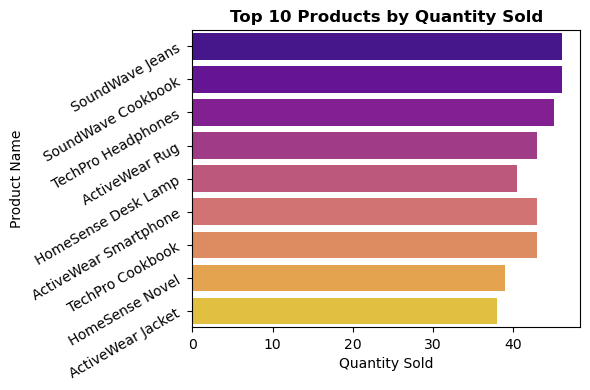

In [53]:
top_products = (
    df_transaction.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()
    .merge(df_product, on='ProductID')
)
print("Top 10 Products Sold by Quantity:\n", top_products)
print()
plt.figure(figsize=(6, 4))
sns.barplot(x = 'Quantity', y = 'ProductName', data = top_products, hue = 'ProductName', legend = False, palette = 'plasma', errorbar=None)
plt.title('Top 10 Products by Quantity Sold', fontsize=12, weight='bold')
plt.xlabel('Quantity Sold', fontsize=10)
plt.ylabel('Product Name', fontsize=10)
plt.yticks(rotation=30)

plt.tight_layout()
plt.show()

   TransactionDate  TotalRevenue      Month
0          2023-12       3769.52 2023-12-01
1          2024-01      66376.39 2024-01-01
2          2024-02      51459.27 2024-02-01
3          2024-03      47828.73 2024-03-01
4          2024-04      57519.06 2024-04-01
5          2024-05      64527.74 2024-05-01
6          2024-06      48771.18 2024-06-01
7          2024-07      71366.39 2024-07-01
8          2024-08      63436.74 2024-08-01
9          2024-09      70603.75 2024-09-01
10         2024-10      47063.22 2024-10-01
11         2024-11      38224.37 2024-11-01
12         2024-12      59049.20 2024-12-01



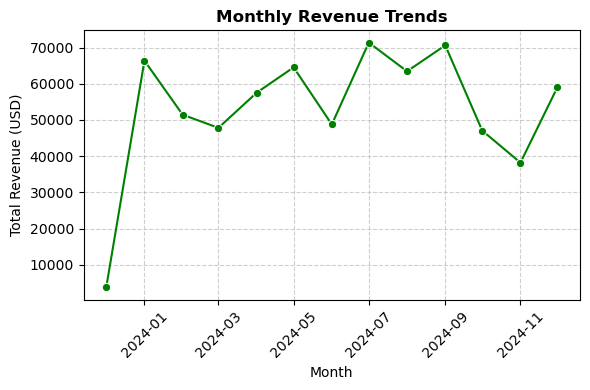

In [55]:
# Calculate monthly revenue
monthly_revenue = (df_transaction.groupby(df_transaction['TransactionDate'].dt.to_period('M'))['TotalValue'].sum().reset_index(name='TotalRevenue'))
monthly_revenue['Month'] = monthly_revenue['TransactionDate'].dt.to_timestamp()
print(monthly_revenue)
print()
plt.figure(figsize=(6,4))
sns.lineplot(x='Month', y='TotalRevenue', data = monthly_revenue, marker='o', color='green', linewidth=1.5)

plt.title('Monthly Revenue Trends', fontsize=12, weight='bold')
plt.xlabel('Month', fontsize=10)
plt.ylabel('Total Revenue (USD)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

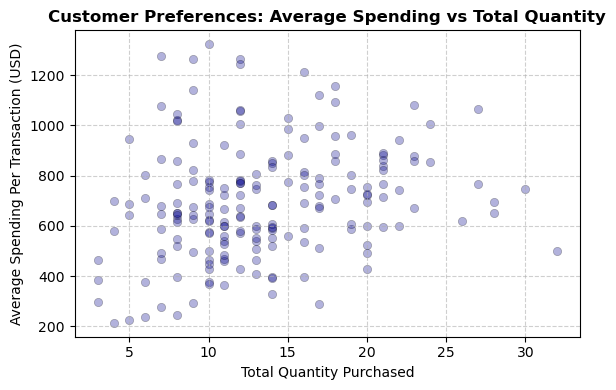

Average Spending per Transaction (Repeat Customers):
count     187.000000
mean      697.794044
std       225.298041
min       214.266667
25%       555.335952
50%       678.080000
75%       822.863750
max      1323.133333
Name: AvgSpending, dtype: float64

Total Quantity Purchased (Repeat Customers):
count    187.000000
mean      13.417112
std        5.724624
min        3.000000
25%        9.000000
50%       12.000000
75%       17.000000
max       32.000000
Name: TotalQuantity, dtype: float64


In [57]:
# Calculate average spending and quantities for repeat customers
repeat_customers = (df_transaction.groupby('CustomerID').agg(TotalQuantity=('Quantity', 'sum'),
        TotalSpending=('TotalValue', 'sum'),
        TransactionCount=('TransactionID', 'count')
    ).reset_index())

repeat_customers = repeat_customers[repeat_customers['TransactionCount'] > 1]
repeat_customers['AvgSpending'] = repeat_customers['TotalSpending'] / repeat_customers['TransactionCount']

plt.figure(figsize=(6, 4))
sns.scatterplot(x = 'TotalQuantity', y = 'AvgSpending', data = repeat_customers, color = 'darkblue', alpha=0.3, edgecolor='black')

plt.title('Customer Preferences: Average Spending vs Total Quantity', fontsize=12, weight='bold')
plt.xlabel('Total Quantity Purchased', fontsize=10)
plt.ylabel('Average Spending Per Transaction (USD)', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
print("Average Spending per Transaction (Repeat Customers):")
print(repeat_customers['AvgSpending'].describe())

print("\nTotal Quantity Purchased (Repeat Customers):")
print(repeat_customers['TotalQuantity'].describe())

In [59]:
df_transaction.to_csv('df_transaction.csv', index=False)
df_customer.to_csv('df_customer.csv', index=False)
df_product.to_csv('df_product.csv', index=False)